<a href="https://colab.research.google.com/github/khwwang/coding-training/blob/master/230705_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이진분류

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
!gdown https://raw.githubusercontent.com/devdio/flyai_datasets/main/diabetes.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/flyai_datasets/main/diabetes.csv
To: /content/diabetes.csv
23.9kB [00:00, 50.7MB/s]       


In [4]:
diabetes = pd.read_csv('diabetes.csv')

In [5]:
df = diabetes.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
df[cols]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
...,...,...,...,...,...
763,101,76,48,180,32.9
764,122,70,27,0,36.8
765,121,72,23,112,26.2
766,126,60,0,0,30.1


In [19]:
df[cols] = df[cols].replace(0, np.nan)

In [20]:
for col in cols:
  df[col] = df[col].fillna(df[col].mean())

In [21]:
X = df.iloc[:,:8]
y = df['Outcome']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y)
#y의 값들이 한쪽 값에 몰리는 상황을 방지

In [23]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train_s = rs.fit_transform(X_train)
X_test_s = rs.transform(X_test)

In [48]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(units=16, activation='relu', input_shape=(8,)),
    layers.Dense(units=8, activation='relu'),
    layers.Dense(units=1, activation='sigmoid'),
])
#input_shape는 tuple형식으로 들어가야한다

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                144       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)# 이진분류이기 때문에 binary_crossentropy를 사용

In [51]:
EPOCHS=100
BATCH=16

history = model.fit(
    X_train_s, y_train,
    epochs = EPOCHS,
    batch_size = BATCH,
    validation_split=0.2,
    verbose = 1
)

Epoch 1/100
31/31 [==============================] - 2s 13ms/step - loss: 0.7877 - accuracy: 0.3523 - val_loss: 0.7486 - val_accuracy: 0.4472
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.7180 - accuracy: 0.4827 - val_loss: 0.6976 - val_accuracy: 0.5854
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6717 - accuracy: 0.6171 - val_loss: 0.6618 - val_accuracy: 0.6992
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6349 - accuracy: 0.7393 - val_loss: 0.6286 - val_accuracy: 0.7642
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.7556 - val_loss: 0.5948 - val_accuracy: 0.7561
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5592 - accuracy: 0.7637 - val_loss: 0.5624 - val_accuracy: 0.7642
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5271 - accuracy: 0.7637 - val_loss: 0.5345 - val_accuracy: 0.7561
Epoch 8/100


In [52]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch']=history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')

    plt.legend()
    plt.show()

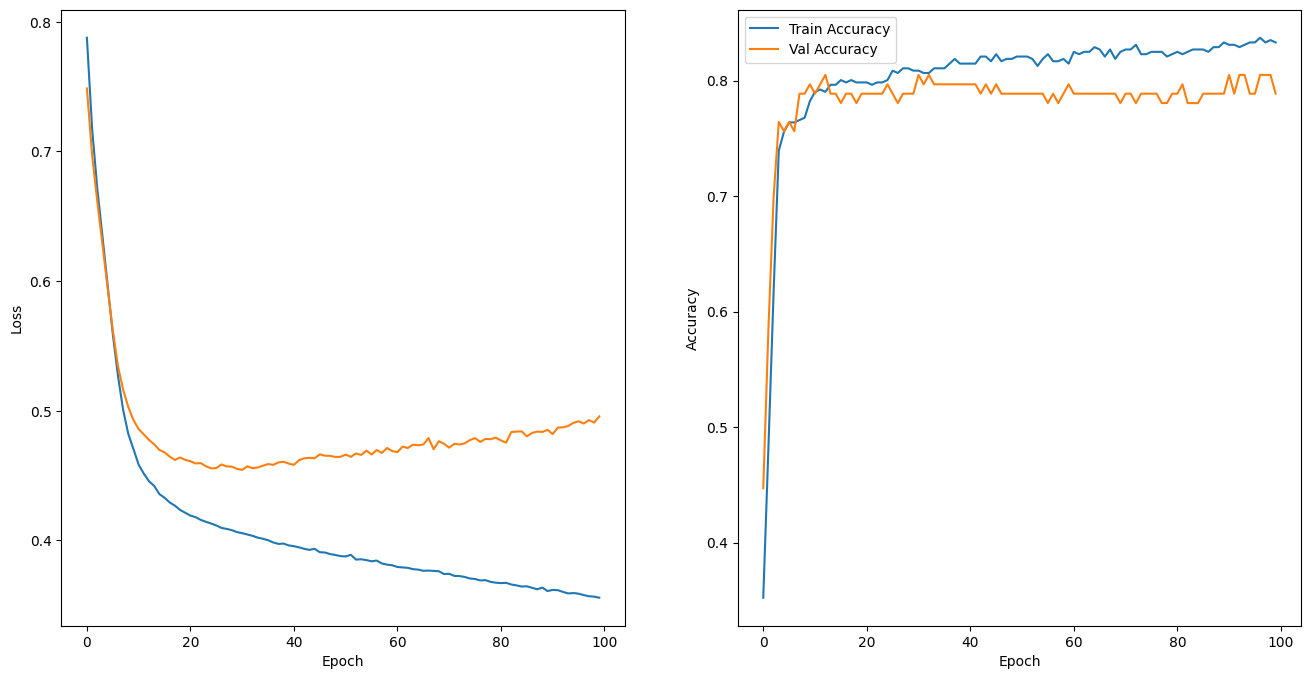

In [53]:
plot_history(history)

In [58]:
y_pred = model.predict(X_test_s)

5/5 [==============================] - 0s 3ms/step


In [61]:
y_pred = (y_pred > 0.5).astype('int').reshape(-1)

In [63]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy_score(y_test, y_pred)

0.7077922077922078

<Axes: >

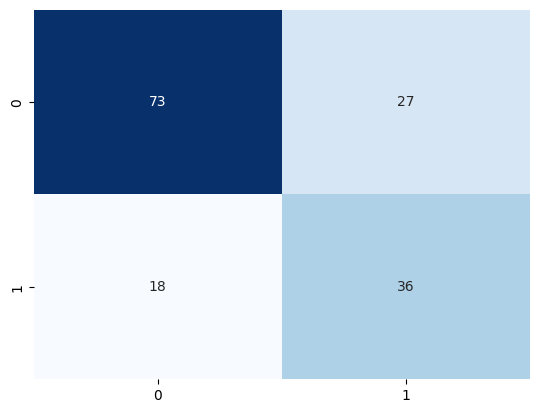

In [64]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)

# iris

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [73]:
iris = pd.read_csv('iris.csv')
df = iris.copy()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [67]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [68]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [74]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
X = df.iloc[:,:4]
y = df['Species']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [92]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)

In [93]:
X_train_s.shape

(120, 4)

In [100]:
model = keras.Sequential()
model.add(layers.Dense(units=32, activation='relu', input_shape=(4,)))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=3, activation='softmax'))
# 다중분류에서는 target값을 onehotencoding을 사용

In [101]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                160       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 3)                 51        
                                                                 
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [103]:
EPOCHS=200
BATCH=32

history = model.fit(
    X_train_s, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH,
    validation_split=0.2,
    verbose = 1
)

Epoch 1/200
3/3 [==============================] - 1s 107ms/step - loss: 1.1184 - accuracy: 0.3646 - val_loss: 1.1192 - val_accuracy: 0.2917
Epoch 2/200
3/3 [==============================] - 0s 27ms/step - loss: 1.0861 - accuracy: 0.3646 - val_loss: 1.0819 - val_accuracy: 0.3333
Epoch 3/200
3/3 [==============================] - 0s 19ms/step - loss: 1.0574 - accuracy: 0.3854 - val_loss: 1.0470 - val_accuracy: 0.3333
Epoch 4/200
3/3 [==============================] - 0s 32ms/step - loss: 1.0299 - accuracy: 0.3750 - val_loss: 1.0132 - val_accuracy: 0.3333
Epoch 5/200
3/3 [==============================] - 0s 27ms/step - loss: 1.0014 - accuracy: 0.4479 - val_loss: 0.9835 - val_accuracy: 0.4583
Epoch 6/200
3/3 [==============================] - 0s 18ms/step - loss: 0.9778 - accuracy: 0.5729 - val_loss: 0.9537 - val_accuracy: 0.6667
Epoch 7/200
3/3 [==============================] - 0s 22ms/step - loss: 0.9550 - accuracy: 0.6771 - val_loss: 0.9253 - val_accuracy: 0.7917
Epoch 8/200
3/3 [==

In [104]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch']=history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')

    plt.legend()
    plt.show()

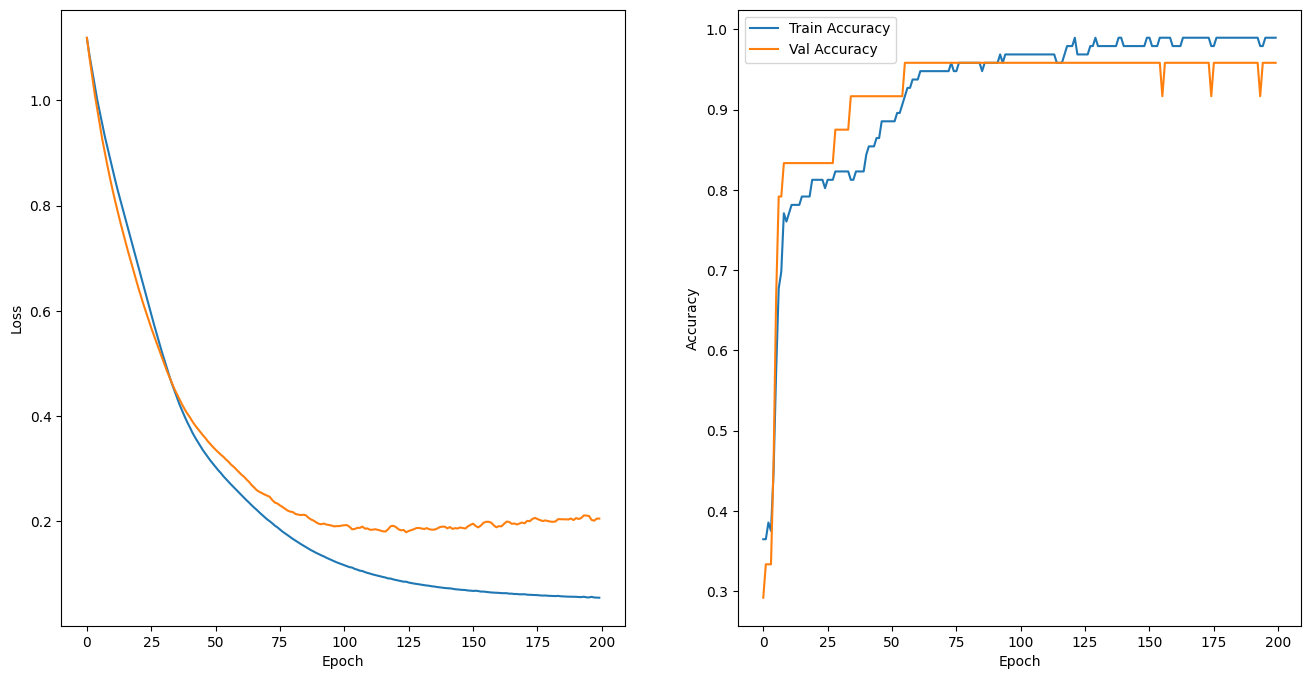

In [105]:
plot_history(history)

In [106]:
y_pred = model.predict(X_test_s)

1/1 [==============================] - 0s 170ms/step


In [110]:
y_pred = np.argmax(y_pred, axis=1)# 가장 큰값의 인덱스를 알려준다

In [111]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy_score(y_test, y_pred)

1.0

<Axes: >

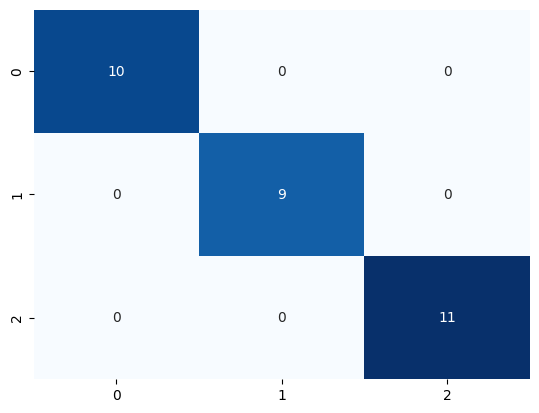

In [112]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)

# penguins

In [294]:
penguins = pd.read_csv('penguins.csv')
df = penguins.copy()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [296]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [297]:
df = df.dropna()

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [299]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [300]:
y = df['species']
X = df.iloc[:,1:]

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [302]:
from sklearn.preprocessing import LabelEncoder

le  = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [303]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)

In [304]:
X_train['island'] = le.fit_transform(X_train['island'])
X_test['island'] = le.transform(X_test['island'])
X_train

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
230,0,40.9,13.7,214.0,4650.0,FEMALE
84,1,37.3,17.8,191.0,3350.0,FEMALE
303,0,50.0,15.9,224.0,5350.0,MALE
22,0,35.9,19.2,189.0,3800.0,FEMALE
29,0,40.5,18.9,180.0,3950.0,MALE
...,...,...,...,...,...,...
194,1,50.9,19.1,196.0,3550.0,MALE
77,2,37.2,19.4,184.0,3900.0,MALE
112,0,39.7,17.7,193.0,3200.0,FEMALE
277,0,45.5,15.0,220.0,5000.0,MALE


In [305]:
X_train['sex'] = le.fit_transform(X_train['sex'])
X_test['sex'] = le.transform(X_test['sex'])

In [306]:
one_hot_encoded = to_categorical(X_train['island'])
one_hot = pd.DataFrame(one_hot_encoded).rename(columns={0:'Gentoo', 1:'Dream', 2:'Torgersen'})
one_hot

,Gentoo,Dream,Torgersen
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
262,0.0,1.0,0.0
263,0.0,0.0,1.0
264,1.0,0.0,0.0
265,1.0,0.0,0.0


In [307]:
X_train

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
230,0,40.9,13.7,214.0,4650.0,1
84,1,37.3,17.8,191.0,3350.0,1
303,0,50.0,15.9,224.0,5350.0,2
22,0,35.9,19.2,189.0,3800.0,1
29,0,40.5,18.9,180.0,3950.0,2
...,...,...,...,...,...,...
194,1,50.9,19.1,196.0,3550.0,2
77,2,37.2,19.4,184.0,3900.0,2
112,0,39.7,17.7,193.0,3200.0,1
277,0,45.5,15.0,220.0,5000.0,2


In [308]:
X_train = pd.concat([X_train.iloc[:,1:].reset_index(), one_hot], axis=1)
X_train= X_train.drop('index', axis=1)

In [309]:
one_hot_encod = to_categorical(X_test['island'])
one_h = pd.DataFrame(one_hot_encod).rename(columns={0:'Gentoo', 1:'Dream', 2:'Torgersen'})
one_h

,Gentoo,Dream,Torgersen
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
62,1.0,0.0,0.0
63,0.0,0.0,1.0
64,0.0,0.0,1.0
65,1.0,0.0,0.0


In [310]:
X_test= pd.concat([X_test.iloc[:,1:].reset_index(), one_h], axis=1)
X_test = X_test.drop('index', axis=1)
X_test

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Gentoo,Dream,Torgersen
0,39.5,16.7,178.0,3250.0,1,0.0,1.0,0.0
1,46.9,14.6,222.0,4875.0,1,1.0,0.0,0.0
2,42.1,19.1,195.0,4000.0,2,0.0,0.0,1.0
3,49.8,17.3,198.0,3675.0,1,0.0,1.0,0.0
4,41.1,18.2,192.0,4050.0,2,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
62,43.5,14.2,220.0,4700.0,1,1.0,0.0,0.0
63,36.7,19.3,193.0,3450.0,1,0.0,0.0,1.0
64,35.1,19.4,193.0,4200.0,2,0.0,0.0,1.0
65,51.1,16.5,225.0,5250.0,2,1.0,0.0,0.0


In [311]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [315]:
X_train_s.shape

(267, 8)

In [316]:
model = keras.Sequential()
model.add(layers.Dense(units=32, activation='relu', input_shape=(8,)))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=3, activation='softmax'))
# 다중분류에서는 target값을 onehotencoding을 사용

In [317]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [318]:
EPOCHS=200
BATCH=32

history = model.fit(
    X_train_s, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH,
    validation_split=0.2,
    verbose = 1
)

Epoch 1/200
7/7 [==============================] - 1s 36ms/step - loss: 1.3138 - accuracy: 0.1690 - val_loss: 1.2682 - val_accuracy: 0.1667
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 1.1689 - accuracy: 0.3005 - val_loss: 1.1338 - val_accuracy: 0.3704
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 1.0481 - accuracy: 0.5728 - val_loss: 1.0253 - val_accuracy: 0.5741
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 0.9448 - accuracy: 0.7042 - val_loss: 0.9374 - val_accuracy: 0.6296
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 0.8595 - accuracy: 0.8075 - val_loss: 0.8584 - val_accuracy: 0.6296
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.7847 - accuracy: 0.8216 - val_loss: 0.7869 - val_accuracy: 0.7593
Epoch 7/200
7/7 [==============================] - 0s 8ms/step - loss: 0.7122 - accuracy: 0.8545 - val_loss: 0.7198 - val_accuracy: 0.7778
Epoch 8/200
7/7 [=====

In [319]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch']=history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')

    plt.legend()
    plt.show()

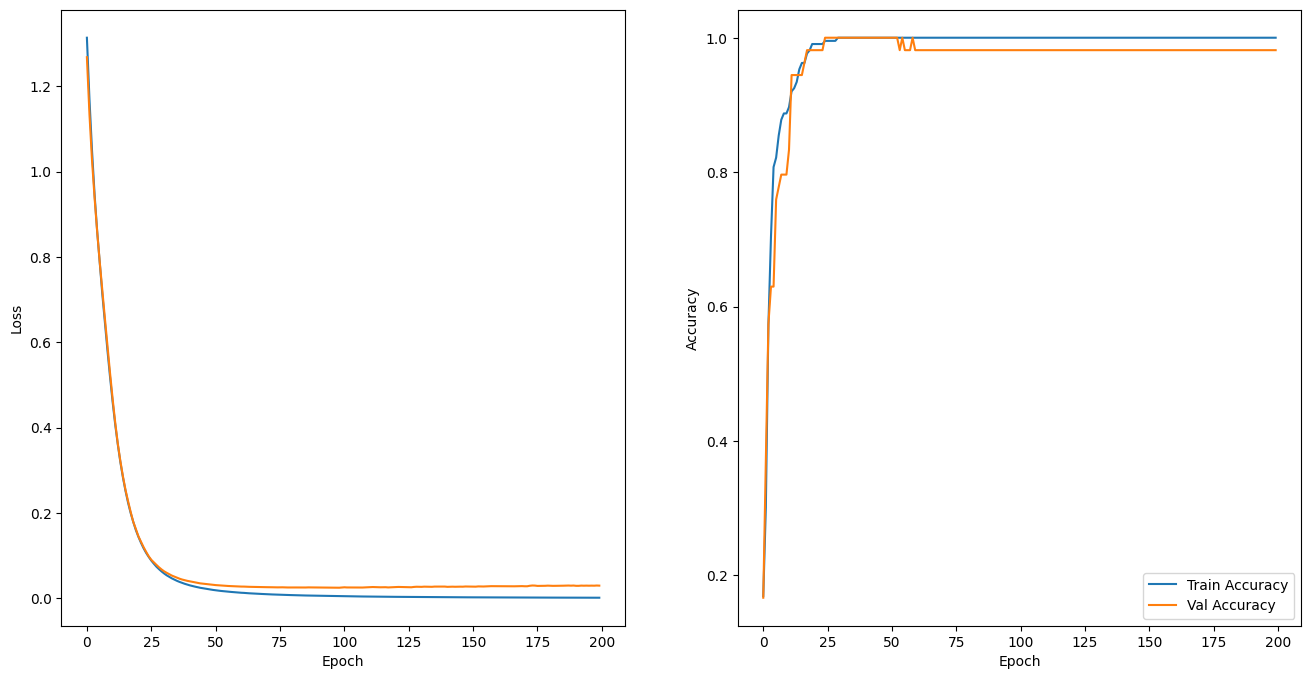

In [320]:
plot_history(history)

In [321]:
y_pred = model.predict(X_test_s)

3/3 [==============================] - 0s 5ms/step


In [322]:
y_pred

array([[9.57100809e-01, 4.24904972e-02, 4.08660591e-04],
       [4.05228166e-05, 5.55362749e-05, 9.99903858e-01],
       [9.99972999e-01, 1.17004884e-05, 1.52946832e-05],
       [2.03181753e-06, 9.99995172e-01, 2.71748286e-06],
       [9.99819279e-01, 4.68428007e-05, 1.33948008e-04],
       [7.28882078e-05, 7.30166430e-05, 9.99854088e-01],
       [1.75958921e-05, 3.91008653e-05, 9.99943197e-01],
       [2.89771706e-04, 9.99658108e-01, 5.20291178e-05],
       [2.72636302e-04, 9.99655604e-01, 7.17621369e-05],
       [5.49984907e-05, 9.99917805e-01, 2.71376248e-05],
       [9.99595582e-01, 1.70905376e-04, 2.33609098e-04],
       [9.99999940e-01, 1.64919562e-08, 3.89631332e-08],
       [1.93927495e-04, 2.25768803e-04, 9.99580324e-01],
       [9.99940336e-01, 4.06196741e-05, 1.89787061e-05],
       [2.16155400e-04, 2.03170785e-04, 9.99580681e-01],
       [9.98108089e-01, 1.72291568e-03, 1.68928207e-04],
       [9.99994218e-01, 3.20885238e-06, 2.56112025e-06],
       [5.27832817e-05, 9.99931

In [323]:
y_test

array([0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2,
       0])

In [324]:
y_pred = np.argmax(y_pred, axis=1)

In [325]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy_score(y_test, y_pred)

1.0

<Axes: >

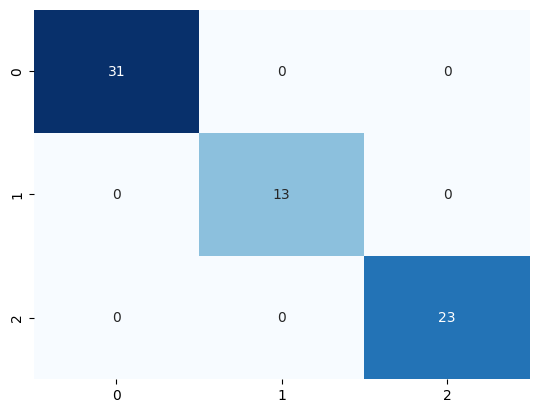

In [326]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)